# Notable Observations: What makes them notable?

 According to the eBird API documentation, notable observations can be for locally or nationally rare species or are otherwise unusual, e.g. over-wintering birds in a species which is normally only a summer visitor.

# Issues to work:

1. DAVID - Notable birds in region - try Texas or Austin (Houston!!) -- pick a few wildlife refuges / on the coast / national seashore / etc

#### Citation: eBird Basic Dataset. Version: EBD_relAug-2020. Cornell Lab of Ornithology, Ithaca, New York. Aug 2020.

In [3]:
# import dependencies
import os, csv, requests, json, datetime
import pandas as pd
import numpy as np
import plotly.express as px
from config import api_key, mapbox_token, g_key
from datetime import date

%reload_ext lab_black

px.set_mapbox_access_token(mapbox_token)

<img src="./Resources/Calliope_Range_Map.png" alt="RANGE MAP: Calliope Hummingbird, https://doi.org/10.2173/bow.calhum.01" style="border: 1px solid darkgray" align="left" width="400px">

<span style="color:white">
<h1 align="center">Notable Observations in Texas</h3>
<h3 align="center">Calliope Hummingbird, Selasphorus calliope</h3>
    
Some range maps for the Calliope Hummingbird extend the Fall Migration zone further east in Texas, but the majority limit the range to west Texas or even far west Texas.  The fall migration south is underway as the Calliope make their way to their wintering grounds in the pine oak forests of Mexico.
    

#### Interesting facts (from WhatBird.com):
    
The Calliope Hummingbird is the smallest bird in the United States, yet it travels more than 5,000 miles from the mountains of the northwest to Mexico and back.

The Calliope Hummingbird is the smallest breeding bird in North America and the smallest long-distance avian migrant in the world.

It prefers high mountains, and has been seen as high as 11,000 feet.
        
A group of hummingbirds has many collective nouns, including a “bouquet", "glittering", "hover", "shimmer", and "tune” of hummingbirds.
    
###### <blockquote>Image citation: Calder, W. A. and L. L. Calder (2020). Calliope Hummingbird (Selasphorus calliope), version 1.0. In Birds of the World (A. F. Poole and F. B. Gill, Editors). Cornell Lab of Ornithology, Ithaca, NY, USA. https://doi.org/10.2173/bow.calhum.01</blockquote>

In [8]:
## Import sound dependencies
from IPython.display import Audio, display


def calliope_call():
    display(
        Audio(
            url="https://www.allaboutbirds.org/guide/assets/sound/535904.mp3",
            autoplay=True,
        )
    )


calliope_call()

# START - TEXAS

In [9]:
today = date.today()
days_back_short = 3
days_back_long = 30

In [10]:
# ALL notable observations in Texas
regionCode = "US-TX"

url_notables = (
    "https://api.ebird.org/v2/data/obs/"
    + regionCode
    + "/recent/notable?back=30"  # max number of days back for observations = 30
)

r_notables = requests.get(
    url_notables, params={"key": api_key, "back": days_back_long, "detail": "full"}
)

In [11]:
r_notables.status_code

200

In [12]:
r_notables.url

'https://api.ebird.org/v2/data/obs/US-TX/recent/notable?back=30&key=d56mdhi9b35r&back=30&detail=full'

### Texas Notable Observations Dataframe

In [13]:
df_notables = pd.DataFrame(r_notables.json())

In [14]:
pd.to_datetime(df_notables["obsDt"])
df_notables["Year"] = pd.DatetimeIndex(df_notables["obsDt"]).year
df_notables["Month"] = pd.DatetimeIndex(df_notables["obsDt"]).month
df_notables["Day"] = pd.DatetimeIndex(df_notables["obsDt"]).day

In [15]:
df_notables.columns  # Pulled in the detailed dataset to pick which columns I wanted to keep and rename.

Index(['speciesCode', 'comName', 'sciName', 'locId', 'locName', 'obsDt',
       'howMany', 'lat', 'lng', 'obsValid', 'obsReviewed', 'locationPrivate',
       'subId', 'subnational2Code', 'subnational2Name', 'subnational1Code',
       'subnational1Name', 'countryCode', 'countryName', 'userDisplayName',
       'obsId', 'checklistId', 'presenceNoted', 'hasComments', 'firstName',
       'lastName', 'hasRichMedia', 'evidence', 'Year', 'Month', 'Day'],
      dtype='object')

In [16]:
df_notables.drop(
    columns=[
        "locId",
        "locName",
        "obsValid",
        "obsReviewed",
        "locationPrivate",
        "userDisplayName",
        "presenceNoted",
        "hasComments",
        "evidence",
        "firstName",
        "lastName",
        "hasRichMedia",
    ]
)

speciesCode                 comName                 sciName  \
0         swtkit     Swallow-tailed Kite    Elanoides forficatus   
1         bulori        Bullock's Oriole       Icterus bullockii   
2         hutvir          Hutton's Vireo           Vireo huttoni   
3         redhea                 Redhead        Aythya americana   
4         coshum     Costa's Hummingbird          Calypte costae   
...          ...                     ...                     ...   
3873      allhum     Allen's Hummingbird       Selasphorus sasin   
3874     royter1              Royal Tern      Thalasseus maximus   
3875      towwar      Townsend's Warbler     Setophaga townsendi   
3876      corfly  Cordilleran Flycatcher  Empidonax occidentalis   
3877      grycat            Gray Catbird  Dumetella carolinensis   

                 obsDt  howMany        lat         lng      subId  \
0     2020-10-01 10:08      1.0  28.123237  -96.977606  S74277235   
1     2020-10-01 09:12      3.0  27.572900  -99.435923  S74274753   
2     2020-10-01 09:00      1.0  30.572180  -97.752201  S74275504   
3     2020-10-01 08:50      3.0  30.706272  -96.464424  S74278340   
4     2020-10-01 08:30      1.0  30.366580 -103.676999  S74273586   
...                ...      ...        ...         ...        ...   
3873  2020-09-01 14:04      1.0  30.617380 -104.097004  S73107524   
3874  2020-09-01 13:30      1.0  30.706272  -96.464424  S73086888   
3875  2020-09-01 13:03      1.0  32.002966 -102.159163  S73081150   
3876  2020-09-01 12:34      1.0  34.910147 -102.113800  S73084885   
3877  2020-09-01 12:34      1.0  34.910147 -102.113800  S73084885   

     subnational2Code subnational2Name subnational1Code subnational1Name  \
0           US-TX-007          Aransas            US-TX            Texas   
1           US-TX-479             Webb            US-TX            Texas   
2           US-TX-491       Williamson            US-TX            Texas   
3           US-TX-041           Brazos            US-TX            Texas   
4           US-TX-043         Brewster            US-TX            Texas   
...               ...              ...              ...              ...   
3873        US-TX-243       Jeff Davis            US-TX            Texas   
3874        US-TX-041           Brazos            US-TX            Texas   
3875        US-TX-329          Midland            US-TX            Texas   
3876        US-TX-381          Randall            US-TX            Texas   
3877        US-TX-381          Randall            US-TX            Texas   

     countryCode    countryName         obsId checklistId  Year  Month  Day  
0             US  United States  OBS989270680     CL23617  2020     10    1  
1             US  United States  OBS989239602     CL25663  2020     10    1  
2             US  United States  OBS989248784     CL23348  2020     10    1  
3             US  United States  OBS989285724     CL22990  2020     10    1  
4             US  United States  OBS989224829     CL24344  2020     10    1  
...          ...            ...           ...         ...   ...    ...  ...  
3873          US  United States  OBS975567160     CL23634  2020      9    1  
3874          US  United States  OBS975332297     CL22990  2020      9    1  
3875          US  United States  OBS975320321     CL25960  2020      9    1  
3876          US  United States  OBS975311354     CL23459  2020      9    1  
3877          US  United States  OBS975311370     CL23459  2020      9    1  

[3878 rows x 19 columns]

In [17]:
columns_dict = {
    "speciesCode": "Species_Code",
    "comName": "Common_Name",
    "sciName": "Scientific_Name",
    "obsDt": "Date",
    "howMany": "Bird_Count",
    "subnational2Code": "City_Code",
    "subnational2Name": "City_Name",
    "subnational1Code": "State_Code",
    "subnational1Name": "State_Name",
    "countryCode": "Country_Code",
    "countryName": "Country_Name",
}

df_notables = df_notables.rename(columns=columns_dict)

In [18]:
df_notables.columns

Index(['Species_Code', 'Common_Name', 'Scientific_Name', 'locId', 'locName',
       'Date', 'Bird_Count', 'lat', 'lng', 'obsValid', 'obsReviewed',
       'locationPrivate', 'subId', 'City_Code', 'City_Name', 'State_Code',
       'State_Name', 'Country_Code', 'Country_Name', 'userDisplayName',
       'obsId', 'checklistId', 'presenceNoted', 'hasComments', 'firstName',
       'lastName', 'hasRichMedia', 'evidence', 'Year', 'Month', 'Day'],
      dtype='object')

In [19]:
df_notables["Bird_Count"].fillna(value=1, inplace=True)

In [20]:
df_notables.to_csv("Resources/TX_NotableObs_eBird.csv", index=False)

In [28]:
TX_NOTABLE_OBS = os.path.join("Resources", "TX_NotableObs_eBird.csv")
TX_NOTABLE_OBS_df = pd.read_csv(TX_NOTABLE_OBS)

In [29]:
# TX_NOTABLE_OBS_df["Notable_Normal"] = 2
TX_NOTABLE_OBS_df.columns

Index(['Species_Code', 'Common_Name', 'Scientific_Name', 'locId', 'locName',
       'Date', 'Bird_Count', 'lat', 'lng', 'obsValid', 'obsReviewed',
       'locationPrivate', 'subId', 'City_Code', 'City_Name', 'State_Code',
       'State_Name', 'Country_Code', 'Country_Name', 'userDisplayName',
       'obsId', 'checklistId', 'presenceNoted', 'hasComments', 'firstName',
       'lastName', 'hasRichMedia', 'evidence', 'Year', 'Month', 'Day'],
      dtype='object')

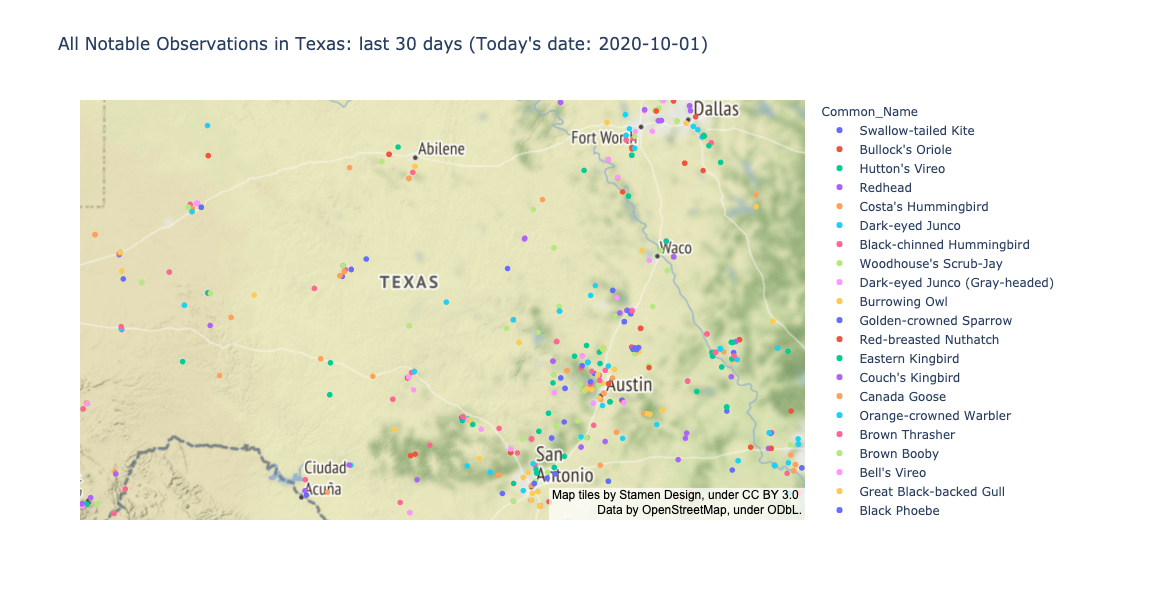

In [224]:
# mapbox_style options:
#     'open-street-map'`,
#     `'white-bg'`, `'carto-positron'`, `'carto-darkmatter'`, `'stamen-
#     terrain'`, `'stamen-toner'`, `'stamen-watercolor'`. Allowed values
#     which do require a Mapbox API token are `'basic'`, `'streets'`,
#     `'outdoors'`, `'light'`, `'dark'`, `'satellite'`, `'satellite-
#     streets'`

fig_TX_NOTABLE_OBS_df = px.scatter_mapbox(
    TX_NOTABLE_OBS_df,
    lat="lat",
    lon="lng",
    color="Common_Name",
    #     size="Bird_Count",
    hover_name="Common_Name",
    hover_data=["Bird_Count", "Date"],
    title=f"All Notable Observations in Texas: last {days_back_long} days (Today's date: {today})",
    mapbox_style="stamen-terrain",
    width=1000,
    height=600,
)
fig_TX_NOTABLE_OBS_df.show()

### Citation: eBird Basic Dataset. Version: EBD_relAug-2020. Cornell Lab of Ornithology, Ithaca, New York. Aug 2020.

In [32]:
TX_NOTABLE_OBS_df.columns

Index(['Species_Code', 'Common_Name', 'Scientific_Name', 'locId', 'locName',
       'Date', 'Bird_Count', 'lat', 'lng', 'obsValid', 'obsReviewed',
       'locationPrivate', 'subId', 'City_Code', 'City_Name', 'State_Code',
       'State_Name', 'Country_Code', 'Country_Name', 'userDisplayName',
       'obsId', 'checklistId', 'presenceNoted', 'hasComments', 'firstName',
       'lastName', 'hasRichMedia', 'evidence', 'Year', 'Month', 'Day'],
      dtype='object')

In [38]:
name_count = TX_NOTABLE_OBS_df["Common_Name"].value_counts()
name_count_df = name_count.to_frame()
name_count_df

Common_Name
Calliope Hummingbird                       154
Red-necked Phalarope                       108
Sabine's Gull                              107
Costa's Hummingbird                         86
Rufous Hummingbird                          86
...                                        ...
Brown-headed Nuthatch (Southeast)            1
Kentucky Warbler                             1
Cattle Egret                                 1
American Kestrel                             1
Common Black Hawk                            1

[321 rows x 1 columns]

In [44]:
species = name_count_df["Common_Name"].idxmax()
species

'Calliope Hummingbird'

In [174]:
TX_species_df = TX_NOTABLE_OBS_df.loc[TX_NOTABLE_OBS_df["Common_Name"] == species]
TX_species_df = TX_species_df.reset_index().drop(columns="index")
TX_species_df["Notable_Normal"] = 2
TX_species_df.head(1)

Species_Code           Common_Name       Scientific_Name    locId  \
0       calhum  Calliope Hummingbird  Selasphorus calliope  L839995   

                                locName              Date  Bird_Count  \
0  Riverpark Nature Trails (Sugar Land)  2020-09-26 16:15         1.0   

        lat        lng  obsValid  ...  presenceNoted  hasComments firstName  \
0  29.57722 -95.677732      True  ...          False        False      Jean   

     lastName hasRichMedia evidence  Year Month Day Notable_Normal  
0  Greenhalgh        False      NaN  2020     9  26              2  

[1 rows x 32 columns]

In [ ]:
TX_species_df.to_csv("Resources/TX_Species_Obs_eBird.csv", index=False)

In [176]:
TX_SPECIES_OBS = os.path.join("Resources", "TX_Species_Obs_eBird.csv")
TX_SPECIES_OBS_df = pd.read_csv(TX_SPECIES_OBS)

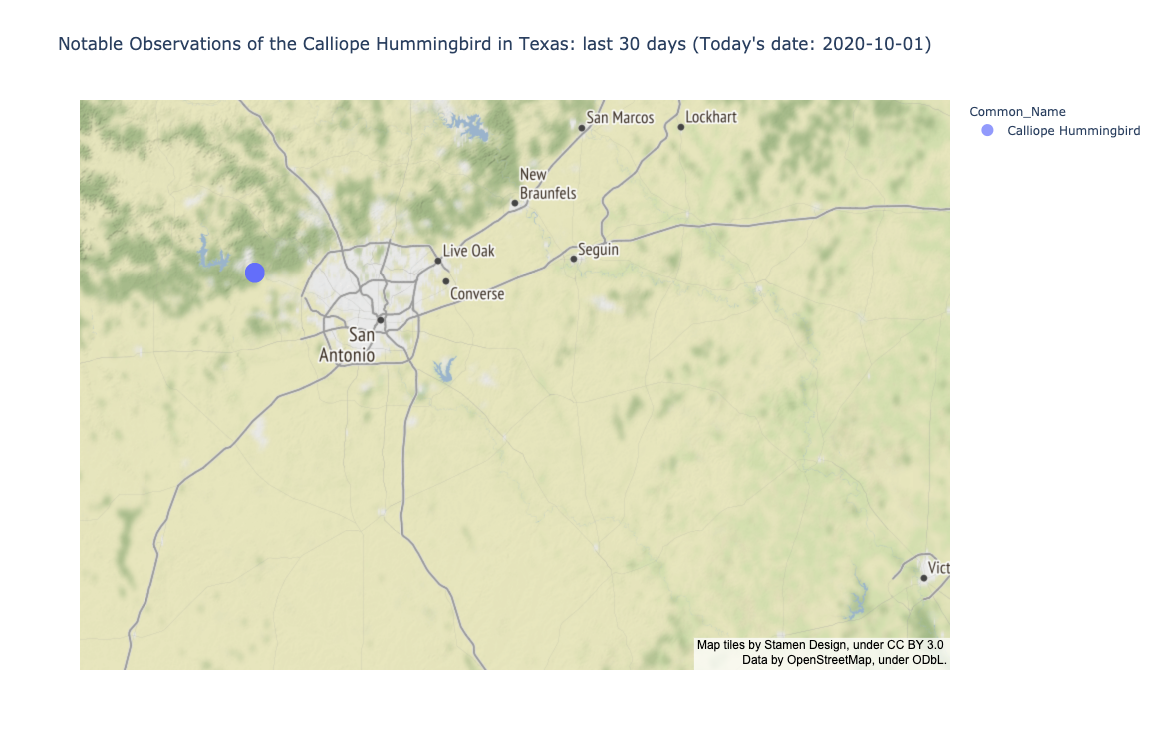

In [152]:
# Maps with plotly

fig_TX_species_df = px.scatter_mapbox(
    TX_species_df,
    lat="lat",
    lon="lng",
    color="Common_Name",
    size="Bird_Count",
    hover_name="Common_Name",
    hover_data=["Bird_Count", "Date"],
    title=f"Notable Observations of the {species} in Texas: last {days_back_long} days (Today's date: {today})",
    mapbox_style="stamen-terrain",
    width=1100,
    height=750,
)
fig_species_df.show()

### CALLIOPE TAXONOMY

In [153]:
TX_species_df.columns

Index(['Species_Code', 'Common_Name', 'Scientific_Name', 'locId', 'locName',
       'Date', 'Bird_Count', 'lat', 'lng', 'obsValid', 'obsReviewed',
       'locationPrivate', 'subId', 'City_Code', 'City_Name', 'State_Code',
       'State_Name', 'Country_Code', 'Country_Name', 'userDisplayName',
       'obsId', 'checklistId', 'presenceNoted', 'hasComments', 'firstName',
       'lastName', 'hasRichMedia', 'evidence', 'Year', 'Month', 'Day',
       'Notable_Normal'],
      dtype='object')

In [154]:
TX_species_df["Species_Code"][0]

'calhum'

In [155]:
species_code = TX_species_df["Species_Code"][0]

In [156]:
# Get the taxonomy for the most common observed species
url_species_taxonomy = "https://api.ebird.org/v2/ref/taxonomy/ebird"

r_species_taxonomy = requests.get(
    url_species_taxonomy,
    params={"key": api_key, "fmt": "json", "species": species_code},
)

In [157]:
r_species_taxonomy.json()

[{'sciName': 'Selasphorus calliope',
  'comName': 'Calliope Hummingbird',
  'speciesCode': 'calhum',
  'category': 'species',
  'taxonOrder': 4691.0,
  'bandingCodes': ['CAHU'],
  'comNameCodes': [],
  'sciNameCodes': ['SECA'],
  'order': 'Caprimulgiformes',
  'familyComName': 'Hummingbirds',
  'familySciName': 'Trochilidae'}]

In [158]:
species_taxonomy_df = pd.DataFrame(r_species_taxonomy.json())
species_taxonomy_df

sciName               comName speciesCode category  \
0  Selasphorus calliope  Calliope Hummingbird      calhum  species   

   taxonOrder bandingCodes comNameCodes sciNameCodes             order  \
0      4691.0       [CAHU]           []       [SECA]  Caprimulgiformes   

  familyComName familySciName  
0  Hummingbirds   Trochilidae

In [159]:
species_taxonomy_df = species_taxonomy_df.rename(
    columns={
        "order": "Order",
        "familySciName": "Family_Name",
        "comName": "Common_Name",
        "sciName": "Scientific_Name",
    }
)

In [160]:
species_taxonomy_df

Scientific_Name           Common_Name speciesCode category  \
0  Selasphorus calliope  Calliope Hummingbird      calhum  species   

   taxonOrder bandingCodes comNameCodes sciNameCodes             Order  \
0      4691.0       [CAHU]           []       [SECA]  Caprimulgiformes   

  familyComName  Family_Name  
0  Hummingbirds  Trochilidae

In [161]:
species_taxonomy_df.to_csv("Resources/Species_Taxonomy.csv", index=False)

# START - US

### Calliope across the US - normal observations

In [133]:
# Get data for specified species observations across the US

regionCodeUS = "US"

url_US_species = (
    f"https://api.ebird.org/v2/data/obs/" + regionCodeUS + "/recent/" + species_code
)

r_US_species = requests.get(
    url_US_species, params={"key": api_key, "back": days_back_long}
)

In [134]:
r_US_species.status_code

200

In [135]:
US_species_df = pd.DataFrame(r_US_species.json())

In [136]:
US_species_df["howMany"].fillna(value=1, inplace=True)

In [137]:
US_species_df["Notable_Normal"] = 1
US_species_df

speciesCode               comName               sciName      locId  \
0        calhum  Calliope Hummingbird  Selasphorus calliope  L11047160   
1        calhum  Calliope Hummingbird  Selasphorus calliope   L7988742   
2        calhum  Calliope Hummingbird  Selasphorus calliope   L2883481   
3        calhum  Calliope Hummingbird  Selasphorus calliope    L129060   
4        calhum  Calliope Hummingbird  Selasphorus calliope    L583547   
..          ...                   ...                   ...        ...   
492      calhum  Calliope Hummingbird  Selasphorus calliope   L4821802   
493      calhum  Calliope Hummingbird  Selasphorus calliope  L10909756   
494      calhum  Calliope Hummingbird  Selasphorus calliope   L8592910   
495      calhum  Calliope Hummingbird  Selasphorus calliope  L12205760   
496      calhum  Calliope Hummingbird  Selasphorus calliope   L6240384   

                                               locName             obsDt  \
0                                            Home list  2020-10-01 06:37   
1                                       Tom's Backyard  2020-09-30 18:12   
2                                        The Ice House  2020-09-30 17:38   
3                                               Portal  2020-09-30 17:27   
4           Davis Mountains Resort (Restricted Access)  2020-09-30 15:27   
..                                                 ...               ...   
492                          Edgemont Highlands Trails  2020-09-01 16:15   
493                                          back yard  2020-09-01 16:00   
494                                    Cathy Benavidez  2020-09-01 16:00   
495  Huachuca Crest Trail—Alpine Meadows Above Bath...  2020-09-01 15:08   
496  2725 Grandview Rd, Gering US-NE (41.8392,-103....  2020-09-01 14:58   

     howMany        lat         lng  obsValid  obsReviewed  locationPrivate  \
0        1.0  31.417106 -110.245284      True        False             True   
1        2.0  32.371215 -106.769178      True         True             True   
2        1.0  31.492044 -110.990056      True        False             True   
3        2.0  31.913601 -109.140800      True        False            False   
4        1.0  30.617380 -104.097004      True        False            False   
..       ...        ...         ...       ...          ...              ...   
492      1.0  37.316489 -107.791865      True        False             True   
493      1.0  35.149666 -106.685988      True        False             True   
494      8.0  35.652076 -105.301077      True        False             True   
495      2.0  31.406344 -110.314323      True        False             True   
496      2.0  41.839235 -103.685050      True         True             True   

         subId  Notable_Normal  
0    S74276679               1  
1    S74262129               1  
2    S74261962               1  
3    S74262487               1  
4    S74264939               1  
..         ...             ...  
492  S73105765               1  
493  S73328972               1  
494  S73132202               1  
495  S73110368               1  
496  S73088916               1  

[497 rows x 14 columns]

In [138]:
US_species_columns_dict = {
    "speciesCode": "Species_Code",
    "comName": "Common_Name",
    "sciName": "Scientific_Name",
    "obsDt": "Date",
    "howMany": "Bird_Count",
}

US_species_df = US_species_df.rename(columns=US_species_columns_dict)

In [139]:
pd.to_datetime(US_species_df["Date"])
US_species_df["Year"] = pd.DatetimeIndex(US_species_df["Date"]).year
US_species_df["Month"] = pd.DatetimeIndex(US_species_df["Date"]).month
US_species_df["Day"] = pd.DatetimeIndex(US_species_df["Date"]).day

In [140]:
US_species_df.columns

Index(['Species_Code', 'Common_Name', 'Scientific_Name', 'locId', 'locName',
       'Date', 'Bird_Count', 'lat', 'lng', 'obsValid', 'obsReviewed',
       'locationPrivate', 'subId', 'Notable_Normal', 'Year', 'Month', 'Day'],
      dtype='object')

In [141]:
US_species_df = US_species_df.drop(
    columns=["locId", "locName", "obsValid", "obsReviewed", "locationPrivate"]
)
US_species_df.columns

Index(['Species_Code', 'Common_Name', 'Scientific_Name', 'Date', 'Bird_Count',
       'lat', 'lng', 'subId', 'Notable_Normal', 'Year', 'Month', 'Day'],
      dtype='object')

In [142]:
US_species_df.to_csv("Resources/US_Species_Obs_eBird.csv", index=False)

In [143]:
US_SPECIES_OBS = os.path.join("Resources", "US_Species_Obs_eBird.csv")
US_SPECIES_OBS_df = pd.read_csv(US_SPECIES_OBS)
US_SPECIES_OBS_df

Species_Code           Common_Name       Scientific_Name  \
0         calhum  Calliope Hummingbird  Selasphorus calliope   
1         calhum  Calliope Hummingbird  Selasphorus calliope   
2         calhum  Calliope Hummingbird  Selasphorus calliope   
3         calhum  Calliope Hummingbird  Selasphorus calliope   
4         calhum  Calliope Hummingbird  Selasphorus calliope   
..           ...                   ...                   ...   
492       calhum  Calliope Hummingbird  Selasphorus calliope   
493       calhum  Calliope Hummingbird  Selasphorus calliope   
494       calhum  Calliope Hummingbird  Selasphorus calliope   
495       calhum  Calliope Hummingbird  Selasphorus calliope   
496       calhum  Calliope Hummingbird  Selasphorus calliope   

                 Date  Bird_Count        lat         lng      subId  \
0    2020-10-01 06:37         1.0  31.417106 -110.245284  S74276679   
1    2020-09-30 18:12         2.0  32.371215 -106.769178  S74262129   
2    2020-09-30 17:38         1.0  31.492044 -110.990056  S74261962   
3    2020-09-30 17:27         2.0  31.913601 -109.140800  S74262487   
4    2020-09-30 15:27         1.0  30.617380 -104.097004  S74264939   
..                ...         ...        ...         ...        ...   
492  2020-09-01 16:15         1.0  37.316489 -107.791865  S73105765   
493  2020-09-01 16:00         1.0  35.149666 -106.685988  S73328972   
494  2020-09-01 16:00         8.0  35.652076 -105.301077  S73132202   
495  2020-09-01 15:08         2.0  31.406344 -110.314323  S73110368   
496  2020-09-01 14:58         2.0  41.839235 -103.685050  S73088916   

     Notable_Normal  Year  Month  Day  
0                 1  2020     10    1  
1                 1  2020      9   30  
2                 1  2020      9   30  
3                 1  2020      9   30  
4                 1  2020      9   30  
..              ...   ...    ...  ...  
492               1  2020      9    1  
493               1  2020      9    1  
494               1  2020      9    1  
495               1  2020      9    1  
496               1  2020      9    1  

[497 rows x 12 columns]

In [179]:
TX_SPECIES_OBS_df = TX_species_df.drop(
    columns=[
        "locId",
        "locName",
        "obsValid",
        "obsReviewed",
        "locationPrivate",
        "City_Code",
        "City_Name",
        "State_Code",
        "State_Name",
        "Country_Code",
        "Country_Name",
        "userDisplayName",
        "obsId",
        "checklistId",
        "presenceNoted",
        "hasComments",
        "firstName",
        "lastName",
        "hasRichMedia",
        "evidence",
    ]
)

In [180]:
TX_SPECIES_OBS_df.columns

Index(['Species_Code', 'Common_Name', 'Scientific_Name', 'Date', 'Bird_Count',
       'lat', 'lng', 'subId', 'Year', 'Month', 'Day', 'Notable_Normal'],
      dtype='object')

In [178]:
US_SPECIES_OBS_df.columns

Index(['Species_Code', 'Common_Name', 'Scientific_Name', 'Date', 'Bird_Count',
       'lat', 'lng', 'subId', 'Notable_Normal', 'Year', 'Month', 'Day'],
      dtype='object')

In [188]:
TX_Notables_Species = TX_SPECIES_OBS_df["subId"].values

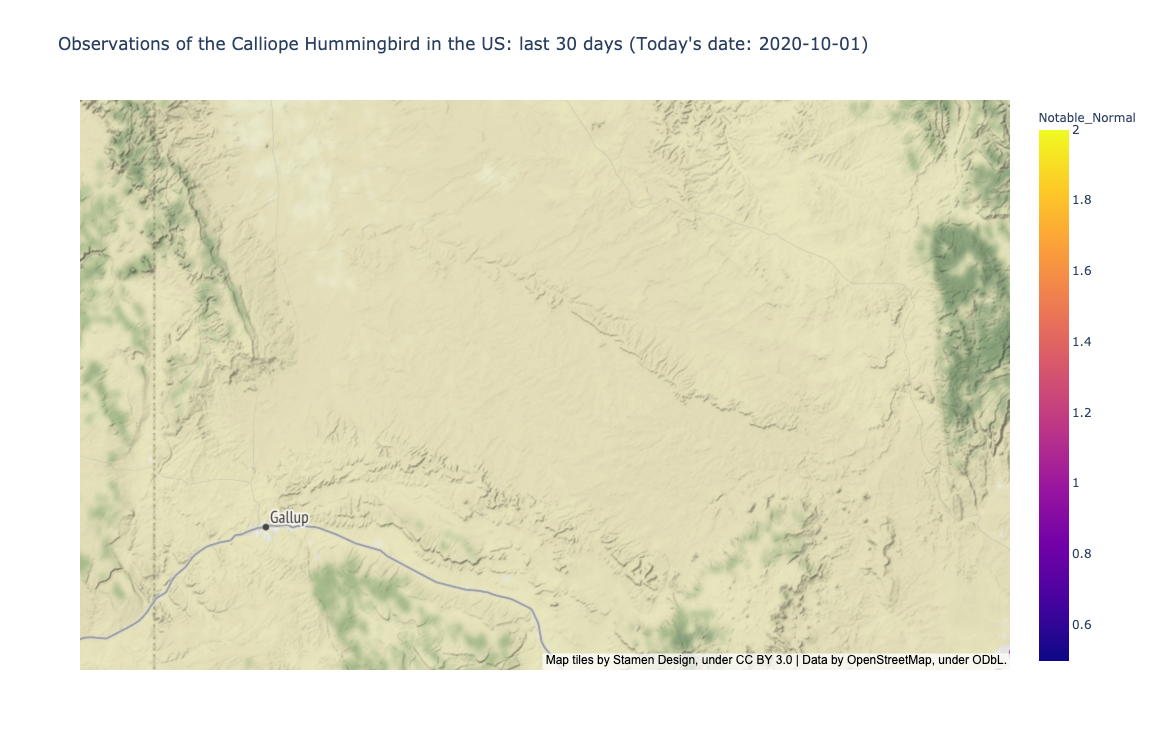

In [222]:
# species_plot = df_species_US.loc[df_species_US["comName"] == f"{species}"]

# Covering US for full 30 days and especially for a single species won't work because you're limited to 10k records. Could be missing a large portion of data.

# US_SPECIES_OBS_df["Notable_Normal"] = US_SPECIES_OBS_df["Notable_Normal"].astype(int)
# TX_SPECIES_OBS_df["Notable_Normal"] = TX_SPECIES_OBS_df["Notable_Normal"].astype(int)

fig_US_SPECIES_OBS_df = px.scatter_mapbox(
    US_SPECIES_OBS_df,
    lat="lat",
    lon="lng",
    color="Notable_Normal",
    #     color_discrete_sequence="#0000FF",
    size="Bird_Count",
    hover_name="Common_Name",
    hover_data=["Scientific_Name", "Bird_Count", "Date"],
    title=f"Observations of the {species} in the US: last {days_back_long} days (Today's date: {today})",
    mapbox_style="stamen-terrain",
    width=1000,
    height=750,
)

fig_US_SPECIES_OBS_df.add_trace(
    px.scatter_mapbox(
        TX_SPECIES_OBS_df,
        lat="lat",
        lon="lng",
        color="Notable_Normal",
        #         color_discrete_sequence="#8B0000",
        size="Bird_Count",
        hover_name="Common_Name",
        hover_data=["Scientific_Name", "Bird_Count", "Date"],
    ).data[0]
)

fig_US_SPECIES_OBS_df.show()

In [230]:
TX_SPECIES_OBS_df.sort_values(by=["Day"], ignore_index=True)

Species_Code           Common_Name       Scientific_Name  \
0         calhum  Calliope Hummingbird  Selasphorus calliope   
1         calhum  Calliope Hummingbird  Selasphorus calliope   
2         calhum  Calliope Hummingbird  Selasphorus calliope   
3         calhum  Calliope Hummingbird  Selasphorus calliope   
4         calhum  Calliope Hummingbird  Selasphorus calliope   
..           ...                   ...                   ...   
149       calhum  Calliope Hummingbird  Selasphorus calliope   
150       calhum  Calliope Hummingbird  Selasphorus calliope   
151       calhum  Calliope Hummingbird  Selasphorus calliope   
152       calhum  Calliope Hummingbird  Selasphorus calliope   
153       calhum  Calliope Hummingbird  Selasphorus calliope   

                 Date  Bird_Count        lat         lng      subId  Year  \
0    2020-09-04 15:18         1.0  32.002966 -102.159163  S73183421  2020   
1    2020-09-04 15:18         1.0  32.002966 -102.159163  S73183421  2020   
2    2020-09-05 13:21         1.0  30.894155 -102.878718  S73219442  2020   
3    2020-09-05 14:09         1.0  30.297931  -97.711237  S73225014  2020   
4    2020-09-05 14:09         1.0  30.297931  -97.711237  S73225014  2020   
..                ...         ...        ...         ...        ...   ...   
149  2020-09-26 07:15         1.0  29.577220  -95.677732  S74072172  2020   
150  2020-09-26 09:30         1.0  29.577220  -95.677732  S74074720  2020   
151  2020-09-26 13:10         1.0  29.577220  -95.677732  S74093310  2020   
152  2020-09-26 15:36         1.0  29.577220  -95.677732  S74111214  2020   
153  2020-09-26 16:15         1.0  29.577220  -95.677732  S74104301  2020   

     Month  Day  Notable_Normal  
0        9    4               2  
1        9    4               2  
2        9    5               2  
3        9    5               2  
4        9    5               2  
..     ...  ...             ...  
149      9   26               2  
150      9   26               2  
151      9   26               2  
152      9   26               2  
153      9   26               2  

[154 rows x 12 columns]

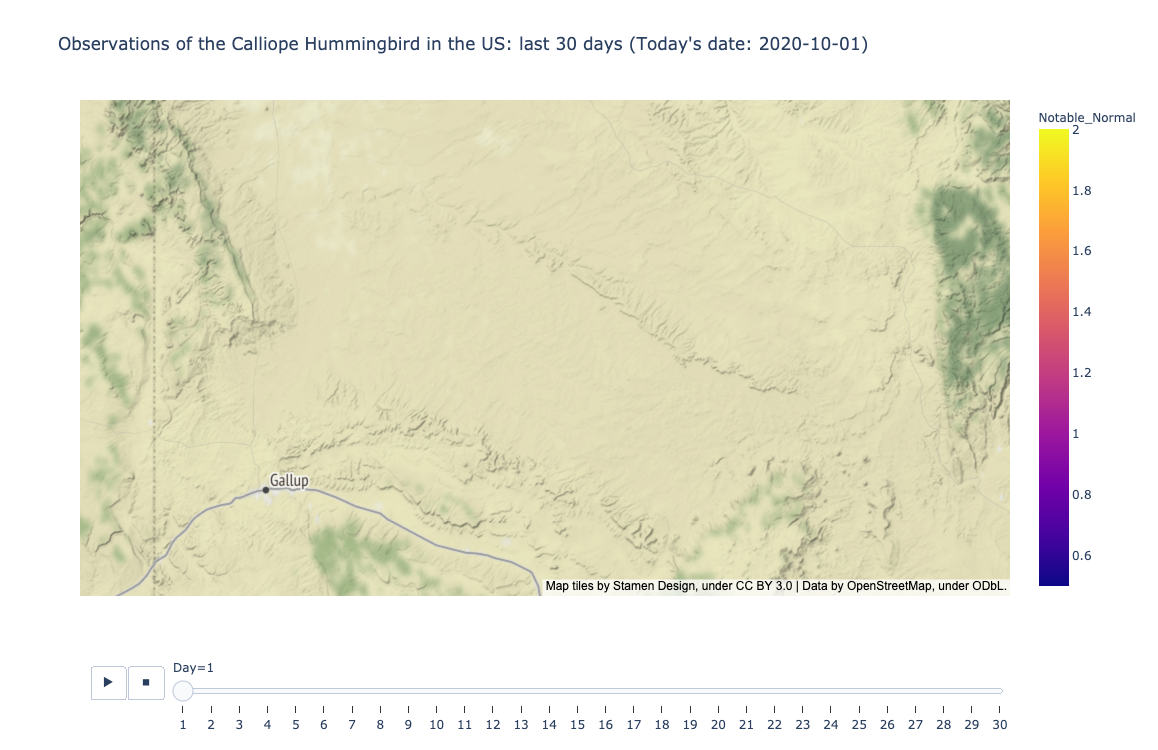

In [239]:
# species_plot = df_species_US.loc[df_species_US["comName"] == f"{species}"]

# Covering US for full 30 days and especially for a single species won't work because you're limited to 10k records. Could be missing a large portion of data.

# US_SPECIES_OBS_df["Notable_Normal"] = US_SPECIES_OBS_df["Notable_Normal"].astype(int)
# TX_SPECIES_OBS_df["Notable_Normal"] = TX_SPECIES_OBS_df["Notable_Normal"].astype(int)

US_SPECIES_OBS_df_animate = US_SPECIES_OBS_df.sort_values(by=["Day"], ignore_index=True)
TX_SPECIES_OBS_df_animate = TX_SPECIES_OBS_df.sort_values(by=["Day"], ignore_index=True)

fig_US_SPECIES_OBS_df = px.scatter_mapbox(
    US_SPECIES_OBS_df_animate,
    lat="lat",
    lon="lng",
    color="Notable_Normal",
    #     color_discrete_sequence="#0000FF",
    size="Bird_Count",
    hover_name="Common_Name",
    hover_data=["Scientific_Name", "Bird_Count", "Date"],
    title=f"Observations of the {species} in the US: last {days_back_long} days (Today's date: {today})",
    mapbox_style="stamen-terrain",
    width=1000,
    height=750,
    animation_frame="Day",
)

fig_US_SPECIES_OBS_df.add_trace(
    px.scatter_mapbox(
        TX_SPECIES_OBS_df_animate,
        lat="lat",
        lon="lng",
        color="Notable_Normal",
        #         color_discrete_sequence="#8B0000",
        size="Bird_Count",
        hover_name="Common_Name",
        hover_data=["Scientific_Name", "Bird_Count", "Date"],
        #         animation_frame="Day",
    ).data[0]
)

fig_US_SPECIES_OBS_df.show()

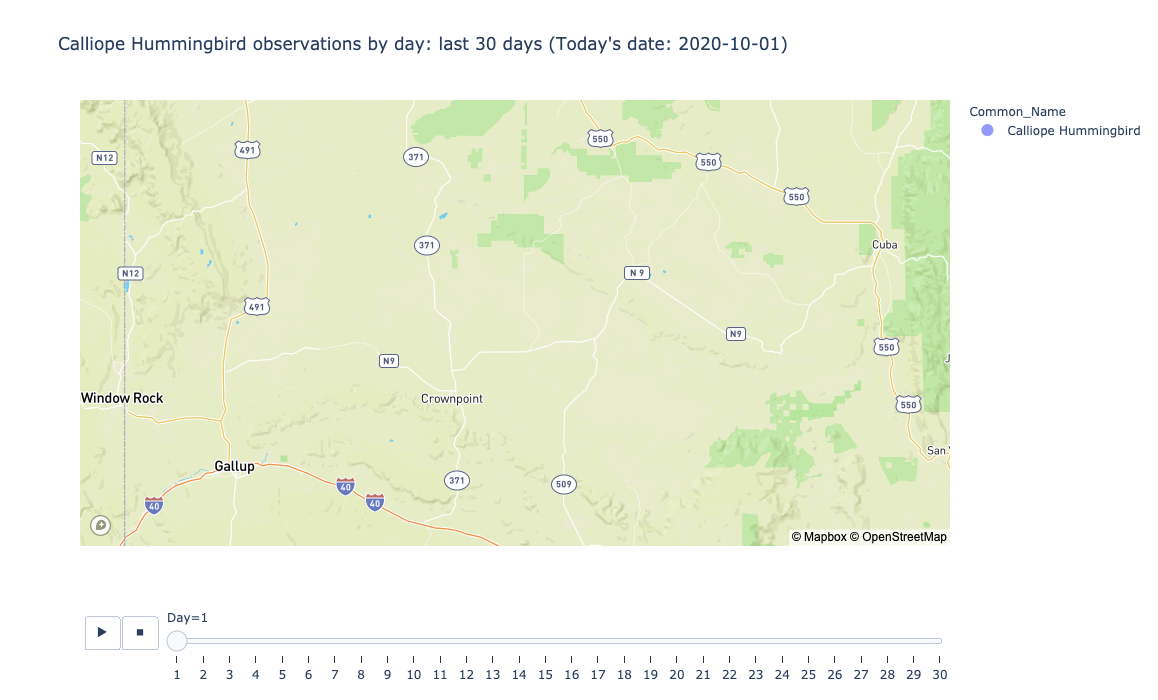

In [223]:
# Animation of species observations over last 30 days
# Add TX notables in different color

# mapbox_style options:
#     'open-street-map'`,
#     `'white-bg'`, `'carto-positron'`, `'carto-darkmatter'`, `'stamen-
#     terrain'`, `'stamen-toner'`, `'stamen-watercolor'`. Allowed values
#     which do require a Mapbox API token are `'basic'`, `'streets'`,
#     `'outdoors'`, `'light'`, `'dark'`, `'satellite'`, `'satellite-
#     streets'`

animate_species_df = US_SPECIES_OBS_df.sort_values(by=["Day"], ignore_index=True)

fig_animate_species = px.scatter_mapbox(
    animate_species_df,
    color="Common_Name",
    lat="lat",
    lon="lng",
    hover_name="Scientific_Name",
    size="Bird_Count",
    animation_frame="Day",
    mapbox_style="outdoors",
    width=1100,
    height=700,
    title=f"{species} observations by day: last {days_back_long} days (Today's date: {today})",
)

fig_animate_species.show()

## Notes:
### Data cleaning: 
#### * Renamed columns --Drop some unneeded columns?
#### * From obsDt column, created new columns Year, Month, Day, and US_State.
#### * Filtered out rows with NA data. Was it only one row with NA for "howMany"? If so, maybe do .fillna() with a value of "1" since the observation wouldn't have been recorded if there were 0 birds. Also, most observations are of 1 bird, right?

### Multiple Data Sources:
#### * eBird
#### * Google API - used reverse geocoding to get state from lat/long. --still working on this (9/28/20)--